# EDA and data preparation
This file includes the following parts: 
- Choose what subreddits will be used for our analysis (we will use 2 or 4 depending on time and scope of the project).
- Create the appropriate dataset by combining the data from the desired subreddits of interest.
- Start EDA on the dataset of interest and observe any possible trends/relations/clues.
- Summarize the findings and recommendations to be used for the modeling part.
- Repeat the same process in case other subreddits are intended to be investigated.

In [78]:

# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import os # to check for file existance

# for time conversion
from datetime import datetime

import re   # for regex

## Functions
---


## 'offmychest' and 'relationship_advice' subreddits
---
In this section, we have investigated two subreddits and tried to see if we can observe any interesting points by doing EDA. The two subreddits of interest are r/offmychest and r/relationship_advice. Both subreddits have a relatively high number of listings per day so this will give us enough information to investigate on. offmychest subreddit mostly contains listings about personal issues, emotional hardships, life problems, and also issues in peoples relationships. The subreddit usually does have a sad tone because people use it as a way to express their feelings, unburden some thoughts, or to confess about things. relationship_advice subreddit focuses more on relationships and the ups and downs in it. <br>
The reasons these two subreddits were used for our investigation is that while these two subreddits represent two topics that could be distinguishable from each other, they do have common points that could make the classification process challenging. Although offmychest includes a wide variety of subjects, it often includes topics which are related to relationship and the problems around it. This overlap can cause our model to struggle since we are mainly relying on the words that used in each listing and having a similar context in both subreddits results in the use of similar vocabularies. 


### combining data from different subreddits if needed

Read the raw data from the two related csv files. Then combine them together, shuffle, and create  a new csv file. Only create the new csv file if there is not already a .csv file. This makes sure that the current data will not be accidentally overwritten. If the user wants to use new raw .csv files from new data scraping, they will have to delete offmychest-relationship_advice.csv file.

In [33]:
# created the necessary file if not already created by mixing two related data
subred1 = 'offmychest'
subred2 = 'relationship_advice'
path = './../dataset/'

if not os.path.isfile(path+subred1+subred2+'.csv'):

    df1 = pd.read_csv(path+subred1+'.csv')
    df1['subreddit'] = subred1
    df2 = pd.read_csv(path+subred2+'.csv')
    df2['subreddit'] = subred2
    df = pd.concat([df1, df2], axis=0)
    df = df.sample(frac=1)  # shuffle the rows
    print(f'===> creating a new .csv file by merging and suffling data from {subred1}.csv and {subred2}.csv')
    df.to_csv(path+subred1+subred2+'.csv', index=False)
else:
    print(f'+++> no new file is generated for these data as {subred1+subred2}.csv file already exists')


+++> no new file is generated for these data as offmychestrelationship_advice.csv file already exists


In this dataset, the columns represent the followings:
- 'text': shows the body text of the listing (listing in this document means the reddit post)
- 'title': shows the title of the listing
- 'listingid': shows the unique id of that listing
- 'created': time (utc) for when the listing is created
- 'url': the url related to that listing
- 'media': media related to the listing
- 'subreddit': the name of the subreddit the listing belongs to

In [34]:
# read data from the .csv file
df = pd.read_csv('./../dataset/offmychestrelationship_advice.csv')
df.head(5)

,text,title,listingid,created,url,media,subreddit
0,\nI have been with the most loving caring man ...,He(18M) broke up with me(18F) over text and i ...,18s2ejz,1.703689e+09,https://www.reddit.com/r/relationship_advice/c...,NaN,relationship_advice
1,i’ll get the frick over it though. i am strong...,pretty sure i’m going through a mild depression,18q4ehr,1.703454e+09,https://www.reddit.com/r/offmychest/comments/1...,NaN,offmychest
2,Just to note there is discussion on sensitive ...,I’m becoming all the things in my past I’ve gr...,18mvf1c,1.703081e+09,https://www.reddit.com/r/offmychest/comments/1...,NaN,offmychest
3,35F - 59M - Pregnancy after prostate cancer.\n...,Pregnancy after prostate cancer. 35F - 59M.,18rb1aj,1.703606e+09,https://www.reddit.com/r/relationship_advice/c...,NaN,relationship_advice
4,"I met a girl name “A” on Yubo About August 18,...",I miss you.,18njdi3,1.703152e+09,https://www.reddit.com/r/offmychest/comments/1...,NaN,offmychest


In [35]:
df.shape

(7761, 7)

In [36]:
print('offmychest: ', sum(df['subreddit'] == 'offmychest'))
print('relationship_advice:', sum(df['subreddit'] == 'relationship_advice'))

offmychest:  3557
relationship_advice: 4204


In [37]:
df.isna().sum()

text            0
title           0
listingid       0
created         0
url             0
media        7761
subreddit       0
dtype: int64

In [38]:
# let us drop the media column
df = df.drop(columns=['media'])

### Extract and analyze listing time

The 'created' column in our dataset shows shows the time that listing is created. Let us see if there is a relationship between the time and the subreddit. 

In [39]:
# convert the created number (in Unix time) to the hour of the day (0-24) and weekday (0-6)
# create two additional columns for it.
# find the posting hour
df['posting_hr'] = df['created'].apply(lambda x: datetime.utcfromtimestamp(x).hour)
# find the posting day (day of the week)
df['posting_day'] = df['created'].apply(lambda x: datetime.utcfromtimestamp(x).weekday())
df.head(1)

,text,title,listingid,created,url,subreddit,posting_hr,posting_day
0,\nI have been with the most loving caring man ...,He(18M) broke up with me(18F) over text and i ...,18s2ejz,1.703689e+09,https://www.reddit.com/r/relationship_advice/c...,relationship_advice,14,2


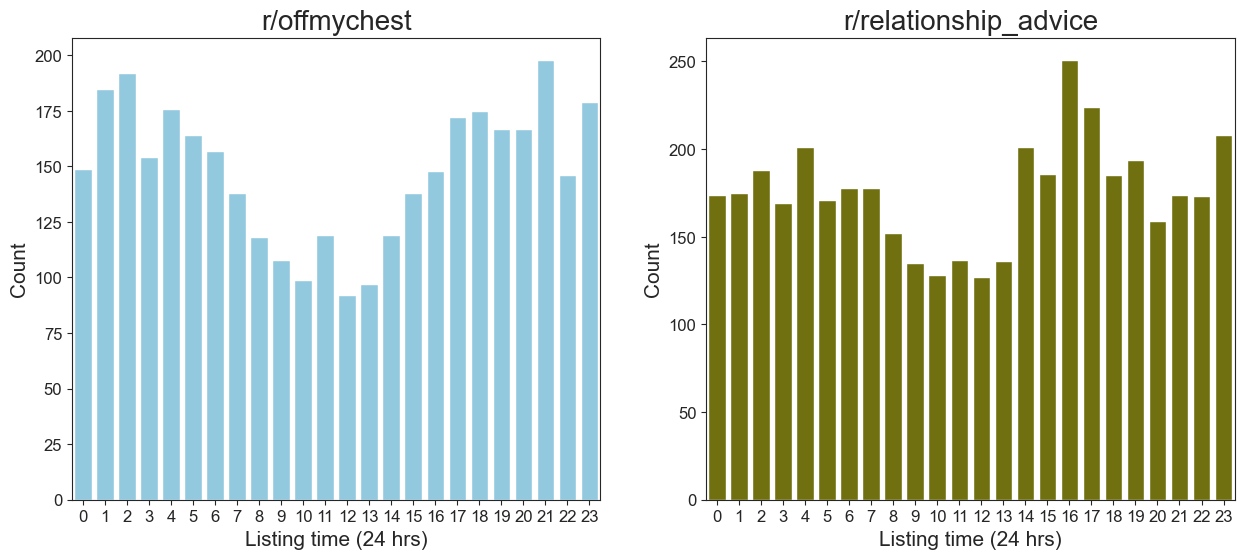

In [76]:
# let us plot the value counts for the hour of the day at which each posting is posted
#plt.figure(figsize=(8,8))
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# plot 1
sns.countplot(data=df[df['subreddit'] == 'offmychest'], x='posting_hr', color='skyblue', ax=ax[0])
ax[0].set_title('r/offmychest', size=20)
ax[0].set_xlabel("Listing time (24 hrs)", fontsize=15)
ax[0].set_ylabel("Count", fontsize=15)

# plot 2
sns.countplot(data=df[df['subreddit'] == 'relationship_advice'], x='posting_hr', color='olive', ax=ax[1])
ax[1].set_title('r/relationship_advice', size=20)
ax[1].set_xlabel("Listing time (24 hrs)", fontsize=15)
ax[1].set_ylabel("Count", fontsize=15)

for ax in ax:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

#plt.tight_layout()

Looking at the overall trend of the number of listing vs listing time, we can say both of the subreddits follow a similar trend and there is not much to separate them here. Also, it should be noted that this data is been collected in a span of a week and such a short time will not be the best representative of the time. For the same reason, we did not use the day of the week data we extracted from the columns. 

### Count the number of words

In [87]:
# create new columns with the number of words in text and titles
df['count_text'] = df['text'].apply(lambda x: len(re.findall(r'(?u)\b\w\w+\b', x)))
df['count_title'] = df['title'].apply(lambda x: len(re.findall(r'(?u)\b\w\w+\b', x)))
df.head(5)

,text,title,listingid,created,url,subreddit,posting_hr,posting_day,count_text,count_title
0,\nI have been with the most loving caring man ...,He(18M) broke up with me(18F) over text and i ...,18s2ejz,1.703689e+09,https://www.reddit.com/r/relationship_advice/c...,relationship_advice,14,2,616,15
1,i’ll get the frick over it though. i am strong...,pretty sure i’m going through a mild depression,18q4ehr,1.703454e+09,https://www.reddit.com/r/offmychest/comments/1...,offmychest,21,6,79,6
2,Just to note there is discussion on sensitive ...,I’m becoming all the things in my past I’ve gr...,18mvf1c,1.703081e+09,https://www.reddit.com/r/offmychest/comments/1...,offmychest,14,2,282,11
3,35F - 59M - Pregnancy after prostate cancer.\n...,Pregnancy after prostate cancer. 35F - 59M.,18rb1aj,1.703606e+09,https://www.reddit.com/r/relationship_advice/c...,relationship_advice,15,1,429,6
4,"I met a girl name “A” on Yubo About August 18,...",I miss you.,18njdi3,1.703152e+09,https://www.reddit.com/r/offmychest/comments/1...,offmychest,9,3,1142,2


In [89]:
# average number of words in text and title for different categories
df.groupby('subreddit').mean()[['count_text', 'count_title']]

C:\Users\masou\AppData\Local\Temp\ipykernel_17424\2696699415.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('subreddit').mean()[['count_text', 'count_title']]


,count_text,count_title
subreddit,,
offmychest,291.441664,8.046669
relationship_advice,388.002379,14.124881


In [94]:
#df[['count_text', 'count_title']].describe()
df.groupby(['subreddit'], as_index=False).agg({'count_text':['min', 'max','mean'],'count_title':['min', 'max','mean']})

subreddit count_text                   count_title               
                              min   max        mean         min max       mean
0           offmychest          1  3574  291.441664           1  52   8.046669
1  relationship_advice          0  3676  388.002379           2  62  14.124881

As we can see, the number of words in the body of text and also the title for the relationship_advice subreddit is almost 25% larger than that of the offmychest subreddit. The same trend is observed for the title count. Now, let us plot distribution of the number of words for each of the subreddits. 

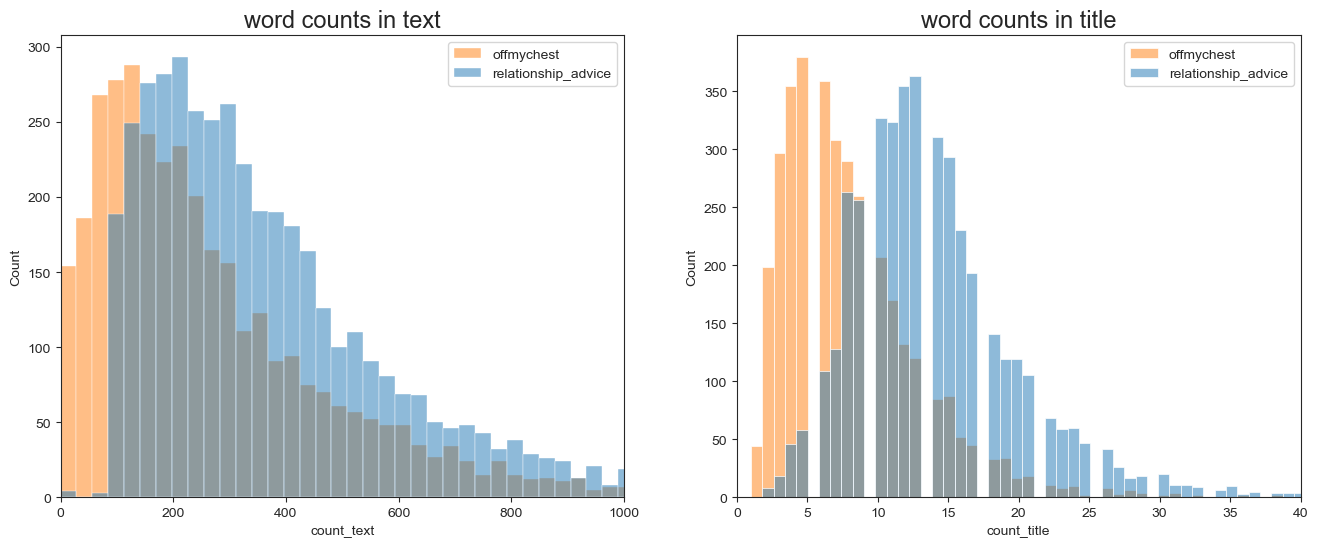

In [113]:
# distribution of the words for each of the subreddits, in the text and title of the listings. 
fig, axs = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=df, x='count_text', hue='subreddit', ax=axs[0])
axs[0].legend(['offmychest', 'relationship_advice'])
axs[0].set_title('word counts in text', size=17)
axs[0].set_xlim([0, 1000])

sns.histplot(data=df, x='count_title', hue='subreddit', ax=axs[1])
axs[1].legend(['offmychest', 'relationship_advice'])
axs[1].set_title('word counts in title', size=17)
axs[1].set_xlim([0, 40]);

The distribution graphs also show that the words count in both title and text of the postings in the relationship advice subreddit is more than that of the offmychest subreddit. This features can be used later to help categorize our listings. 

### Word analysis with CountVectorizer

In this section, we will try to analyze the words in each of the subreddit listings and see what sort of information can we extract from it. 